# Imports and Helper Functions

In [1]:
## Imports
import numpy as np
import math as m
import pylab as plt
import pickle
import sys
from matplotlib.animation import FuncAnimation
import time as t

In [6]:
def forward_diffusion(x0, T, delta):
    xs = [x0]
    for _ in range(T):
        x_old = xs[-1]
        xs.append(x_old + (delta/2)*-x_old+m.sqrt(delta)*np.random.normal(0, 1))
    return xs

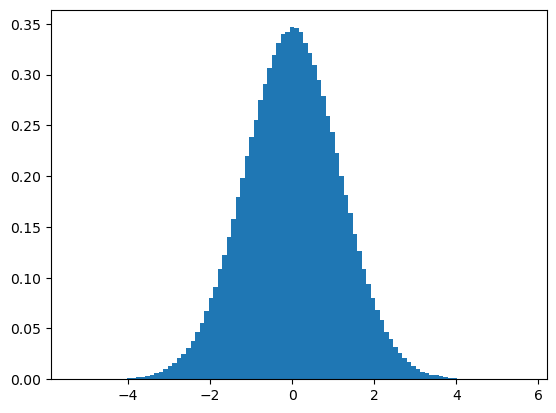

In [22]:
samples = forward_diffusion(10, 1000000, 1)[1000:]
plt.figure()
plt.hist(samples, density=True, bins=100)
plt.show()

In [33]:
def approach_2(x0, T, delta):
    xs = [x0]
    for _ in range(T):
        xn = xs[-1] + m.sqrt(delta)*np.random.normal(0, 1)
        if np.exp((xs[-1]**2 - xn**2)/2) > np.random.rand():
            xs.append(xn)
    return xs

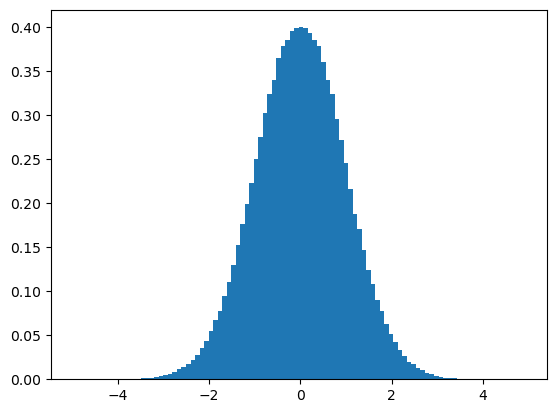

In [34]:
samples = approach_2(10, 1000000, 1)[1000:]
plt.figure()
plt.hist(samples, density=True, bins=100)
plt.show()

In [52]:
def approach_2_2(x0, T, delta):
    xs = [x0]
    for _ in range(T):
        xn = xs[-1] + (delta/2)*-xs[-1] + np.random.normal(0, m.sqrt(delta))
        A = np.exp(delta*(xs[-1] - xn)*(-xs[-1] - xn) + ((delta/2)**2)*(xs[-1]**2 - xn**2))
        A = A * np.exp((xs[-1]**2 - xn**2)/2)
        if A > np.random.rand():
            xs.append(xn)
    return xs

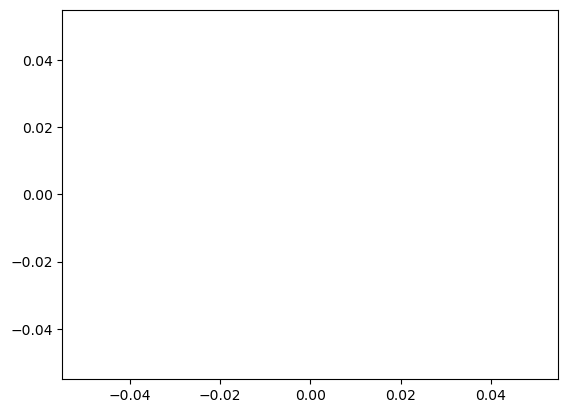

In [53]:
samples = approach_2_2(10, 100, 1)[1000:]
plt.figure()
plt.hist(samples, density=True, bins=100)
plt.show()